# Logistic Regression

선형회귀분석과 유사하지만, Y값이 질적척도임. 특정수치 예측이 아니라 어떤 카테고리에 들어갈지 예측함.

오즈 

사건이 발생할 가능성이 발생하지 않을 가능성보다 어느 정도로 큰지 나타내는 값
(log를 씌운 오즈에 sigmoid 함수를 적용)


#### 혼자 공부하는 머신러닝 + 딥러닝

In [66]:
# 데이터 준비하기 

import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [67]:
# 어떤 종류의 생선이 있는지 Species 에서 고유한 값 추출
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [68]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [69]:
# Species 열을 종속변수로 바꾸고 나머지는 입력 데이터로 사용

# 데이터프레임에서 열 선택하고 넘파이 배열로 바꿔서 저장 
fish_x = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_x[:5])
fish_y = fish[['Species']].to_numpy()
print(fish_y[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
[['Bream']
 ['Bream']
 ['Bream']
 ['Bream']
 ['Bream']]


In [70]:
# 데이터 분할
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(fish_x,fish_y,random_state=777)


In [71]:
# 데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

K-최근접 이웃 분류기의 확률 예측

In [72]:
# KNeighborClassifier 클래스 객체를 만들고 훈련 세트로 모델을 훈련한 다음, 훈련 세트와 테스트 세트의 점수 확인 (k=3)
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train_scaled, y_train)
print(kn.score(x_train_scaled,y_train))
print(kn.score(x_test_scaled,y_test))


0.865546218487395
0.9


c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


사이킷런은 문자열로 된 Y값을 그대로 사용할 수 있다. y값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨지며 정렬된 y값은 classes_ 속성에 저장된다. 

In [73]:
kn.classes_

# Bream 이 첫번째 클래스.. 

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [74]:
# 테스트셋에 있는 5개의 샘플의 y값 예측. 
kn.predict(x_test_scaled[:5])


array(['Smelt', 'Bream', 'Pike', 'Bream', 'Perch'], dtype=object)

In [75]:
import numpy as np

In [76]:
# predict_ proba() 메서드로 클래스 별 확률값을 번환한다. 테스트셋에 있는 처음 5개 샘플에 대한 확률

proba = kn.predict_proba(x_test_scaled[:5])
np.round(proba,decimals=4) # 소수점 5번째에서 반올림

# 첫번째 열이 Bream일 확률, 두번째 열이 Parkki, 세번째 열이 Perch일 확률

array([[0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

In [77]:
# 모델이 계산한 확률이 가장 가까운 이웃의 비율인지 확인
# 네번째 샘플의 최근접 이웃의 클래스 확인하기 

distances, indexes = kn.kneighbors(x_test_scaled[3:4])
y_train[indexes]

# 이 샘플의 이웃은 두번째 클래스인 Bream가 3개다. 따라서 100%인데..?

array([[['Bream'],
        ['Bream'],
        ['Bream']]], dtype=object)

## 로지스틱 회귀

##### 로지스틱회귀로 이진분류 연습

In [78]:
# # 이진분류의 경우 시그모이드함수의 출력이 0.5보다 크면 양성, 작으면 음성
# c = np.array(['A','B','C','D','E'])
# c[[True,False,True,False,False]] # A와 C만 골라내는 방법, T와 F를 전달해주면 행을 선택할 수 있다. (불리언 인덱싱)

In [79]:
# # 도미와 빙어의 행만 True로 만들어서 골라내기

# bream_indexes = (y_train == 'Bream')
# smelt_indexes = (y_train == 'Smelt')

# # 'Bream' 또는 'Smelt'인 행을 선택합니다.
# bream_smelt_indexes = bream_indexes | smelt_indexes

# train_bream_smelt = x_train_scaled[bream_smelt_indexes]
# target_bream_smelt = y_train[bream_smelt_indexes]

# train_bream_smelt = x_train_scaled[bream_smelt_indexes, :]
# target_bream_smelt = y_train[bream_smelt_indexes]

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [81]:
# lr.fit(train_bream_smelt,target_bream_smelt)

# # 훈련한 모델로 x_train_smelt에 있는 5개 샘플 예측
# print(lr.predict(train_bream_smelt[:5]))

# # 예측확률을 predict_proba()메서드에 제공하여 x_bream_smelt에 처음 5개의 샘플 예측 확률 출력
# print(lr.predict_proba(train_bream_smelt[:5]))

# # 샘플마다 2개의 확률 출력 첫번째 열이 음성클래스0에 대한 확률, 두번째 열이 양성 1에 대한 확률
# # 사이킷런은 타깃값을 알파벳순으로 정렬하여 사용함 
# print(lr.classes_) # 확인

In [82]:
# 로지스틱 회귀가 학습한 계수 확인
print(lr.coef_,lr.intercept_) 

# 로지스틱회귀는 선형회귀와 비슷... 

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
# z값 출력 

decision = lr.decision_function(train_bream_smelt[:5])
decision
# z값을 시그모이드 함수에 통과시키면 확률이 나옴.
# 시그모이드 함수는 expit()

In [ ]:
from scipy.special import expit

expit(decision) # 양성 클래스에 대한 z값 반환


NameError: name 'decision' is not defined

## 로지스틱회귀로 다중 분류 수행하기

p.188

In [ ]:
lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(x_train_scaled,y_train)
print(lr.score(x_train_scaled,y_train))
print(lr.score(x_test_scaled,y_test))


0.9159663865546218
0.975


c:\Users\MegaIT302-02\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 출력
lr.predict(x_test_scaled[:5])

array(['Smelt', 'Bream', 'Pike', 'Bream', 'Perch'], dtype=object)

In [ ]:
proba = lr.predict_proba(x_test_scaled[:5])
print(np.round(proba,decimals=3))

[[0.    0.001 0.03  0.    0.003 0.966 0.   ]
 [0.997 0.002 0.    0.    0.    0.    0.001]
 [0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.997 0.002 0.    0.    0.    0.    0.001]
 [0.    0.    0.888 0.003 0.085 0.    0.023]]


In [ ]:
# 선형 방정식, coef와 intercept의 크기 출력 
lr.coef_.shape,lr.intercept_.shape

# x를 7개나 계산한다는 의미. 소프트맥스를 사용하여 0~1 사이의 값으로 변환

((7, 5), (7,))

In [ ]:
decision = lr.decision_function(x_test_scaled[:5])
np.round(decision,decimals=2)
# 테스트 세트의 처음 5개 샘플에 대한 z1~z7값

array([[-13.09,   2.05,   5.49,  -4.67,   3.11,   8.95,  -1.83],
       [ 12.64,   6.25,  -5.85,  -0.69,   0.22, -18.34,   5.77],
       [ -0.71,  -9.46,   2.51,   9.92,   0.62,  -2.28,  -0.59],
       [ 12.37,   6.3 ,  -6.53,  -0.58,   0.36, -17.05,   5.12],
       [ -2.68,  -2.18,   5.36,  -0.2 ,   3.02,  -5.03,   1.7 ]])

In [ ]:
from scipy.special import softmax

proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3))

# decision 배열을 softmax() 함수에 전달. axis 매개변수는 소프트 맥스를 계산할 축을 지정 (안하면 전체)

[[0.    0.001 0.03  0.    0.003 0.966 0.   ]
 [0.997 0.002 0.    0.    0.    0.    0.001]
 [0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.997 0.002 0.    0.    0.    0.    0.001]
 [0.    0.    0.888 0.003 0.085 0.    0.023]]


## 데이터분석가가 반드시 알아야 할 

오즈 : 사건이 발생할 가능성이 발생하지 않을 가능성보다 어느 정도 큰가

In [ ]:
! pip install imbalanced-learn

DEPRECATION: mecab-python 0.996-ko-0.9.2-msvc has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mecab-python or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063



  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   --------------------------------------- 235.6/235.6 kB 14.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('datasets/heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
# BMI, PhysicalHealth 등 숫자형 변수 4개, 나머지는 명목형
# 명목형 변수 더미처리

# 하나의 가변수 범주 제거 옵션 적용
df2 = pd.get_dummies(df,columns=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],drop_first= True)

df2.head()

,BMI,PhysicalHealth,MentalHealth,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,SleepTime_18.0,SleepTime_19.0,SleepTime_20.0,SleepTime_21.0,SleepTime_22.0,SleepTime_23.0,SleepTime_24.0,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,20.34,0.0,0.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,26.58,20.0,30.0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,24.21,0.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,23.71,28.0,0.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


로지스틱 회귀 분석을 하기 위해서는 명목형 변수를 0,1의 가변수 형태로 변환해야 한다. 겟더미즈에 drop_first  = True 옵션을 적용하여 마지막 항목은 제거되도록 변수 가공을 한다.

drop_first 옵션을 True로 설정하면 가변수 생성 시 첫 번째 범주를 제거. 다중공선성 문제를 피하기 위해 사용

In [ ]:
df2.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'HeartDisease_Yes',
       'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'DiffWalking_Yes',
       'Sex_Male', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_White', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)',
       'PhysicalActivity_Yes', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good', 'SleepTime_2.0',
       'SleepTime_3.0', 'SleepTime_4.0', 'SleepTime_5.0', 'SleepTime_6.0',
       'SleepTime_7.0', 'SleepTime_8.0', 'SleepTime_9.0', 'SleepTime_10.0',
       'SleepTime_11.0', 'SleepTime_12.0', 'SleepTime_13.0', 'SleepTime_14.0',
       'Sleep

In [ ]:
# 숫자형 변수 분리
df_num = df[["BMI",'PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df.drop(["BMI",'PhysicalHealth','MentalHealth','SleepTime'],axis=1) # 왜 df2에 드랍이지?

# 숫자형 변수 RobustScaler 적용
robustScaler = RobustScaler()
df_robust = robustScaler.fit_transform(df_num)

# 칼럼명 결합
df_num2 = pd.DataFrame(data=df_robust,columns=df_num.columns)

# 숫자형 테이블과 더미화 문자형 테이블 결합
df3 = pd.concat([df_num2,df_nom],axis=1)


df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,-1.453315,1.5,10.0,-1.0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,-0.947226,0.0,0.0,0.0,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,-0.102842,10.0,10.0,0.5,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,-0.423545,0.0,0.0,-0.5,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,-0.491204,14.0,0.0,0.5,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


로지스틱 회귀분석은 정규화 과정을 통해 과적합을 방지하는 프로세스가 있으므로 스케일을 조정해야 한다. 

명목형 변수와 숫자형 변수를 분리한 다음, 숫자형 변수만 있는 데이터셋에 RoubustScaler() 함수 적용

다시 명목형 변수 데이터셋과 결합

In [ ]:
df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,-1.453315,1.5,10.0,-1.0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,-0.947226,0.0,0.0,0.0,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,-0.102842,10.0,10.0,0.5,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,-0.423545,0.0,0.0,-0.5,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,-0.491204,14.0,0.0,0.5,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [ ]:
df2.head()


,BMI,PhysicalHealth,MentalHealth,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,SleepTime_18.0,SleepTime_19.0,SleepTime_20.0,SleepTime_21.0,SleepTime_22.0,SleepTime_23.0,SleepTime_24.0,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,20.34,0.0,0.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,26.58,20.0,30.0,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,24.21,0.0,0.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,23.71,28.0,0.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 독립변수와 종속변수 분리하여 생성
x = df2.drop(['HeartDisease_Yes'],axis=1)
y = df2[['HeartDisease_Yes']]

# 학습셋과 테스트셋 분리하여 생성
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.25,random_state=10)

print('train data:',len(x_train))
print('test data:',len(x_test))


train data: 239846
test data: 79949


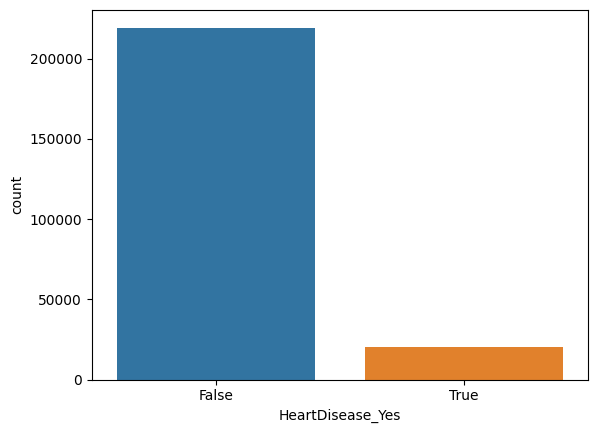

In [ ]:
# HeratDisease_Yes 컬럼 클래스 분포 시각화
sns.countplot(x="HeartDisease_Yes",data=y_train)
plt.show()
plt.close()

In [ ]:
# 임시 변수명 적용
# 기존 변수명은 언더샘플링이나 오버샘플링 적용 시 오류가 발생하기 때문에 변수명을 임시적으로 변경 

x_train_re = x_train.copy()
y_train_re = y_train.copy()

x_temp_name = []
for i in range(1,38) :
    x_temp_name.append('x'+str(i))   

y_temp_name = ['y1']

In [ ]:
# 언더샘플링 적용
x_train_under , y_train_under = RandomUnderSampler(random_state=0).fit_resample(x_train_re,y_train_re)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트 :',x_train_re.shape,y_train_re.shape)
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트 :',x_train_under.shape,y_train_under.shape)


RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트 : (239846, 59) (239846, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트 : (41036, 59) (41036, 1)
